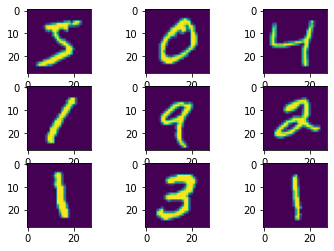

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
from keras.models import load_model
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import np_utils
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(x_train[i])
plt.show()

In [ ]:
x_re=x_test
y_re=y_test
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test /= 255

In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
#tạo lớp ẩn
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2))) #tich chap 32 lan, (bo 3x3), ham truyen relu

In [ ]:
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 6s 11ms/step - loss: 0.1357 - accuracy: 0.9581 - val_loss: 0.0405 - val_accuracy: 0.9865
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0281 - val_accuracy: 0.9907
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0242 - val_accuracy: 0.9924
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0222 - val_accuracy: 0.9922
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0260 - val_accuracy: 0.9914
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0249 - val_accuracy: 0.9912
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0206 - val_accuracy: 0.9940

313/313 [==============================] - 1s 4ms/step - loss: 0.0535 - accuracy: 0.9933
Test loss= 0.05349317193031311
Test accuracy= 0.9933000206947327


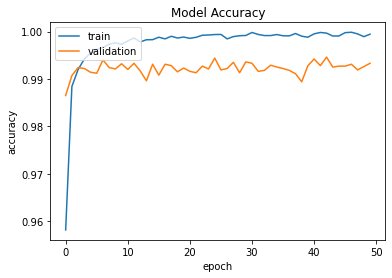

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

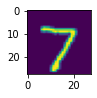

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


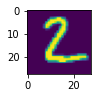

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


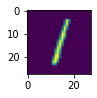

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


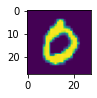

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


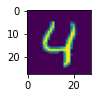

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


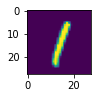

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


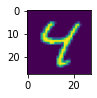

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


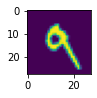

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


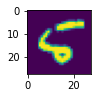

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x_re[i])
  plt.show()
  print(np.round(y_pred[i]))

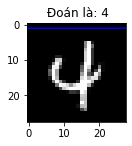

In [ ]:
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_accuracy'], color='blue',label='train')
Label = ['0', '1', '2', '3',
'4', '5', '6', '7', '8', '9']
test = 1300
plt.title(" Đoán là: " +
str(Label[np.argmax(model.predict(x_re[test].reshape((-1,x_train.shape[1],x_train.shape[2],1))))]))
y_test[test]
plt.imshow(x_re[test],
cmap=plt.get_cmap('gray'))

Text(0.5, 1.0, ' Đoán là: 5')

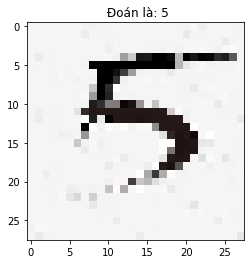

In [ ]:
url = '/content/5.jpg'
img=load_img(url,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
#img=img.reshape(-1,x_train.shape[1],x_train.shape[2],1)
img=img.astype('float32')
img=img/255
plt.title(" Đoán là: " +
str(Label[np.argmax(model.predict(img.reshape((-1,x_train.shape[1],x_train.shape[2],1))))]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MNIST(CNN).ipynb')

Mounted at /content/drive
--2022-05-19 02:41:25--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-19 02:41:25 (41.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MNIST(CNN).ipynb to pdf
[NbConvertApp] Support files will be in MNIST(CNN)_files/
[NbConvertApp] Making directory ./MNIST(CNN)_files
[NbConvertApp] Making directory ./MNIST(CNN)_files
[NbConvertApp] Making directory ./MNIST(CNN)_files
[NbConvertApp] Making directory ./MNIST(CNN)_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'